In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Games.csv

In [ ]:
game_data = pd.read_csv('/content/gdrive/MyDrive/BT4222/Raw Data/games.csv')

In [ ]:
print(game_data.shape)
print(game_data.columns)

(50564, 13)
Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')


In [ ]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50564 non-null  int64  
 1   title           50564 non-null  object 
 2   date_release    50564 non-null  object 
 3   win             50564 non-null  bool   
 4   mac             50564 non-null  bool   
 5   linux           50564 non-null  bool   
 6   rating          50564 non-null  object 
 7   positive_ratio  50564 non-null  int64  
 8   user_reviews    50564 non-null  int64  
 9   price_final     50564 non-null  float64
 10  price_original  50564 non-null  float64
 11  discount        50564 non-null  int64  
 12  steam_deck      50564 non-null  bool   
dtypes: bool(4), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
game_data.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.056400e+04,50564.000000,5.056400e+04,50564.000000,50564.000000,50564.000000
mean,1.049583e+06,77.042975,1.774188e+03,8.560316,9.178613,5.718515
std,6.066192e+05,18.256988,3.910364e+04,11.474274,11.925020,18.772251
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.270475e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.805305e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.516450e+06,91.000000,2.030000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [ ]:
game_data['user_reviews'].sum()

89710052

In [ ]:
game_data.isnull().sum().sort_values(ascending=False)

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [ ]:
game_data[game_data['app_id'].duplicated()]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck


In [ ]:
game_data.sort_values(['user_reviews'], ascending=False).head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
46841,730,Counter-Strike: Global Offensive,21/8/2012,True,True,True,Very Positive,88,7297791,14.99,0.00,0,True
47480,578080,PUBG: BATTLEGROUNDS,21/12/2017,True,False,False,Mixed,57,2187691,0.00,0.00,0,True
46839,570,Dota 2,9/7/2013,True,True,True,Very Positive,82,1998934,0.00,0.00,0,True
47093,271590,Grand Theft Auto V,13/4/2015,True,False,False,Very Positive,86,1431104,0.00,0.00,0,True
47207,359550,Tom Clancy's Rainbow Six® Siege,1/12/2015,True,False,False,Very Positive,86,966803,19.99,19.99,0,True
46835,440,Team Fortress 2,10/10/2007,True,True,True,Very Positive,93,960279,0.00,0.00,0,True
46948,105600,Terraria,16/5/2011,True,True,True,Overwhelmingly Positive,97,909308,9.99,9.99,0,True
46852,4000,Garry's Mod,29/11/2006,True,True,True,Overwhelmingly Positive,96,827095,9.99,9.99,0,True
47065,252490,Rust,8/2/2018,True,True,False,Very Positive,87,761516,39.99,39.99,0,True
48069,1172470,Apex Legends™,4/11/2020,True,False,False,Very Positive,81,671472,0.00,0.00,0,True


In [ ]:
game_data_processed = game_data.copy()
print(game_data_processed.shape)

#drop games with review< 19 (25%)
game_data_processed = game_data_processed[game_data_processed['user_reviews'] >= 19]
print(game_data_processed.shape)

(50564, 13)
(38245, 13)


In [ ]:
game_data_processed['release_year'] = game_data['date_release'].astype(str).str[-4:]
game_data_processed['release_month'] = game_data['date_release'].map(lambda x: datetime.strptime(x, "%d/%m/%Y").strftime("%B"))
game_data_processed.drop(['date_release'], axis=1, inplace=True)
game_data_processed.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,release_month
0,13500,Prince of Persia: Warrior Within™,True,False,False,Very Positive,84,2199,9.99,9.99,0,True,2008,November
1,22364,BRINK: Agents of Change,True,False,False,Positive,85,21,2.99,2.99,0,True,2011,August
2,113020,Monaco: What's Yours Is Mine,True,True,True,Very Positive,92,3722,14.99,14.99,0,True,2013,April
3,226560,Escape Dead Island,True,False,False,Mixed,61,873,14.99,14.99,0,True,2014,November
4,249050,Dungeon of the ENDLESS™,True,True,False,Very Positive,88,8784,11.99,11.99,0,True,2014,October


In [ ]:
#convert true false to integers
To_int = ['win', 'mac', 'linux', 'steam_deck']
game_data_processed[To_int]= game_data_processed[To_int].astype(int)
game_data_processed.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,release_month
0,13500,Prince of Persia: Warrior Within™,1,0,0,Very Positive,84,2199,9.99,9.99,0,1,2008,November
1,22364,BRINK: Agents of Change,1,0,0,Positive,85,21,2.99,2.99,0,1,2011,August
2,113020,Monaco: What's Yours Is Mine,1,1,1,Very Positive,92,3722,14.99,14.99,0,1,2013,April
3,226560,Escape Dead Island,1,0,0,Mixed,61,873,14.99,14.99,0,1,2014,November
4,249050,Dungeon of the ENDLESS™,1,1,0,Very Positive,88,8784,11.99,11.99,0,1,2014,October


In [ ]:
# map the rating
mapping= {'Very Positive':7, 'Positive':6, 'Mixed':4, 'Mostly Positive':5,
       'Overwhelmingly Positive':8, 'Mostly Negative':3,
       'Overwhelmingly Negative':0, 'Negative':2, 'Very Negative':1}
game_data_processed['rating']=game_data_processed['rating'].map(lambda x: mapping[x])

In [ ]:
game_data_processed.drop(['price_final'], axis=1, inplace=True)
game_data_processed.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_original,discount,steam_deck,release_year,release_month
0,13500,Prince of Persia: Warrior Within™,1,0,0,7,84,2199,9.99,0,1,2008,November
1,22364,BRINK: Agents of Change,1,0,0,6,85,21,2.99,0,1,2011,August
2,113020,Monaco: What's Yours Is Mine,1,1,1,7,92,3722,14.99,0,1,2013,April
3,226560,Escape Dead Island,1,0,0,4,61,873,14.99,0,1,2014,November
4,249050,Dungeon of the ENDLESS™,1,1,0,7,88,8784,11.99,0,1,2014,October


# Game description.json

In [ ]:
import ast
import json

In [ ]:
data={}
with open('/content/gdrive/MyDrive/BT4222/Raw Data/games_metadata.json', 'r') as file:
    for line in file:
        parsed_line = ast.literal_eval(line)
        for key, value in parsed_line.items():
            if key in data:
                data[key].append(value)
            else:
                data[key] = [value]

In [ ]:
game_des= pd.DataFrame(data)

In [ ]:
des_NA= len(game_des[game_des['description']==''])
tags_NA = len(game_des[game_des['tags'].apply(len) == 0])
print(f'number of empty descriptions {des_NA}')
print(f'number of empty tags {tags_NA}')

number of empty descriptions 10300
number of empty tags 1171


In [ ]:
games= pd.merge(game_data_processed, game_des, on=['app_id'], how = 'left')

In [ ]:
len(games[games['tags'].apply(len) == 0])/len(games)

0.021466858412864425

In [ ]:
len(games[games['description'] == ""])/len(games)

0.1866649235194143

<Axes: xlabel='user_reviews'>

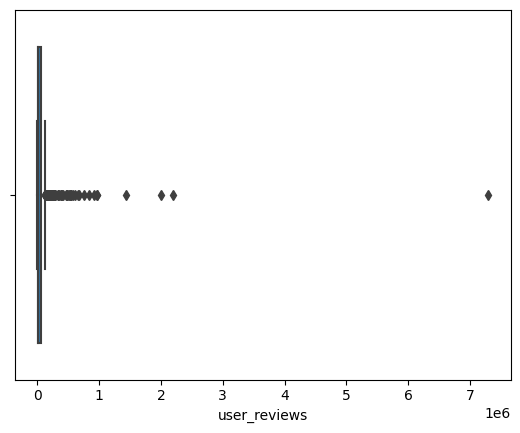

In [ ]:
sns.boxplot(data=games[games['tags'].apply(len) == 0], x='user_reviews')

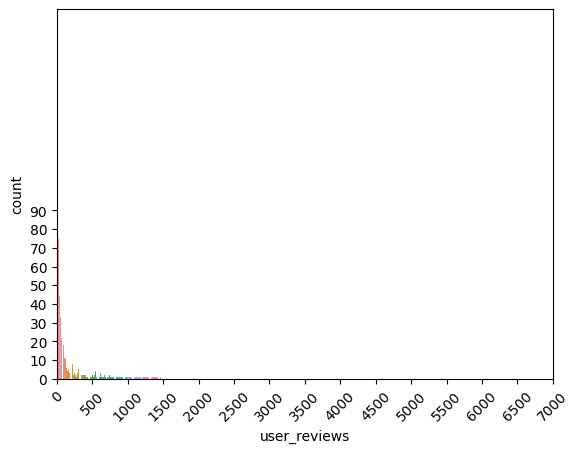

In [ ]:
sns.countplot(data=games[games['description'] == ""], x='user_reviews')
y_labels_step = 10
max_y_value = 99

# Set y-label positions
y_labels = range(0, max_y_value + 1, y_labels_step)
plt.yticks(y_labels)
plt.xticks(rotation=45)
x_labels_step = 500
x_labels = range(0, len(games[games['description'] == ""]) + 1, x_labels_step)
plt.xticks(x_labels, x_labels)
plt.show()

In [ ]:
games[games['description'] == ""][['title', 'user_reviews']].sort_values(['user_reviews'], ascending=False)

,title,user_reviews
35496,Counter-Strike: Global Offensive,7297791
36135,PUBG: BATTLEGROUNDS,2187691
35494,Dota 2,1998934
35748,Grand Theft Auto V,1431104
35862,Tom Clancy's Rainbow Six® Siege,966803
...,...,...
9967,Archangel Hellfire - Fully Loaded,19
9816,Session: Skate Sim Brandalised® Pack,19
9666,Train Simulator: Union Pacific GP30 Loco Add-On,19
9625,DRAGON BALL FIGHTERZ - Commentator Voice Pack,19


In [ ]:
len(games[(games['description'] == "")|(games['tags'].apply(len) == 0)])/len(games)

0.18684795398091253

In [ ]:
print(games.shape)
games_with_missing_data = games[(games['description'] == "")|(games['tags'].apply(len) == 0)]
print(games_with_missing_data.shape)
games_reduced = games[~((games['description'] == "") | (games['tags'].apply(len) == 0))]
print(games_reduced.shape)

(38245, 15)
(7146, 15)
(31099, 15)


In [ ]:
games_scraped = pd.read_csv('/content/gdrive/MyDrive/BT4222/Intermediate Data/Games_scraped.csv', usecols=lambda column: column != 'Unnamed: 0')

In [ ]:
print(games_scraped.shape)

(7146, 15)


In [ ]:
full_game_merged = pd.concat([games_reduced, games_scraped], axis=0)
print(full_game_merged.shape)
full_game_merged.sort_values(['user_reviews'], ascending=False).head()

(38245, 15)


,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_original,discount,steam_deck,release_year,release_month,description,tags
0,730,Counter-Strike: Global Offensive,1,1,1,7,88,7297791,0.00,0,1,2012,August,"For over two decades, Counter-Strike has offer...","FPS, Shooter, Multiplayer, Competitive, Action..."
1,578080,PUBG: BATTLEGROUNDS,1,0,0,4,57,2187691,0.00,0,1,2017,December,Play PUBG: BATTLEGROUNDS for free. Land on str...,"Survival, Shooter, Battle Royale, Multiplayer,..."
2,570,Dota 2,1,1,1,7,82,1998934,0.00,0,1,2013,July,"Every day, millions of players worldwide enter...","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,271590,Grand Theft Auto V,1,0,0,7,86,1431104,0.00,0,1,2015,April,Grand Theft Auto V for PC offers players the o...,"Open World, Action, Multiplayer, Crime, Automo..."
4,359550,Tom Clancy's Rainbow Six® Siege,1,0,0,7,86,966803,19.99,0,1,2015,December,"Tom Clancy's Rainbow Six® Siege is an elite, t...","FPS, PvP, eSports, Shooter, Multiplayer, Tacti..."


In [ ]:
# full_game_merged.to_csv('/content/gdrive/MyDrive/BT4222/full_game_merged.csv', index=False)

In [ ]:
still_missing = full_game_merged[(full_game_merged['description'].isna())|full_game_merged['tags'].apply(lambda x: x=='[]')]
print(still_missing.shape)
len(still_missing)/len(full_game_merged)

(6486, 15)


0.16959079618250752

In [ ]:
still_missing.sort_values(['user_reviews'], ascending=False).head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_original,discount,steam_deck,release_year,release_month,description,tags
377,1118010,Monster Hunter World: Iceborne,1,0,0,4,56,15219,39.99,0,1,2020,January,NaN,"Action, Multiplayer, Co-op, Open World, Huntin..."
436,642250,Ragnarok - ARK Expansion Map,1,1,1,5,79,10768,0.00,0,1,2017,June,NaN,"Survival, Adventure, Dinosaurs, Massively Mult..."
445,1426300,The Binding of Isaac: Repentance,1,0,0,7,80,9994,0.00,0,1,2021,March,NaN,"Action, Adventure, RPG, Roguelike, Difficult, ..."
453,306460,Unturned - Permanent Gold Upgrade,1,1,1,7,93,9365,4.99,0,1,2014,July,NaN,"Free to Play, Survival, Zombies, Multiplayer, ..."
472,771300,Grand Theft Auto V - Criminal Enterprise Start...,1,0,0,4,67,8519,9.99,0,1,2017,December,NaN,"Action, Adventure, Multiplayer, Sexual Content..."


In [ ]:
game_tags = pd.read_csv('Games_tags_one_hot.csv')

In [ ]:
game_encoded= pd.merge(game_tags, games, on='app_id', how='left' )
game_encoded.drop(['tags'], axis=1, inplace=True)

In [ ]:
#one-encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(game_encoded[['release_year', 'release_month']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(['release_year', 'release_month']))

result_df = pd.concat([game_encoded, one_hot_df], axis=1)

result_df = result_df.drop(['release_year', 'release_month'], axis=1)
result_df

In [ ]:
#standard scaling
data= result_df.drop(['description', 'title'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(data[['positive_ratio','user_reviews','price_original','discount']])

# Transform your data using the scaler
data[['positive_ratio','user_reviews','price_original','discount']] = scaler.transform(data[['positive_ratio','user_reviews','price_original','discount']])
data

In [ ]:
data.to_csv('game_tag_processed.csv')

# Recommendation.csv

In [ ]:
recommendation= pd.read_csv('/content/gdrive/MyDrive/BT4222/Raw Data/recommendations.csv')

In [ ]:
recommendation.shape

(38347614, 8)

In [ ]:
recommendation.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49618,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243365,2
3,703080,0,0,2022-09-23,True,27.4,248653,3
4,526870,0,0,2021-01-10,True,7.9,22898,4


In [ ]:
recommendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38347614 entries, 0 to 38347613
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.0+ GB


In [ ]:
recommendation['is_recommended']=recommendation['is_recommended'].astype('int')

In [ ]:
recommendation[recommendation[['app_id','user_id']].duplicated(keep=False)].sort_values(by='app_id').head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
36398854,220,0,0,2021-12-19,1,18.8,5275748,36398854
16933500,220,0,0,2021-12-07,1,18.8,5275748,16933500
24887439,440,0,0,2021-12-04,1,658.0,2336682,24887439
24170089,440,0,0,2021-12-02,1,658.0,2336682,24170089
38334395,231140,0,0,2015-08-17,1,3.6,5744622,38334395
37301411,231140,0,0,2015-03-01,0,3.6,5744622,37301411
14254084,266840,0,0,2015-06-11,0,761.3,5034326,14254084
13388299,266840,0,0,2016-04-22,1,761.3,5034326,13388299
737242,270880,0,0,2022-01-06,1,143.0,8049027,737242
4894532,270880,0,0,2021-12-16,0,143.0,8049027,4894532


In [ ]:
recommendation.drop_duplicates(subset=['app_id', 'user_id'], keep='last', inplace=True)

In [ ]:
recommendation.shape

(38347595, 8)

In [ ]:
affected_reviews = recommendation[recommendation['app_id'].isin(still_missing['app_id'])]
print(affected_reviews.shape)

(1463, 8)


In [ ]:
print("Percentage of affected recommendations before scraping:")
len(recommendation[recommendation['app_id'].isin(games_with_missing_data['app_id'])])/len(recommendation)

Percentage of affected recommendatiosn before scraping:


0.538261525918379

In [ ]:
print("Percentage of affected recommendatiosn after scraping:")
len(affected_reviews)/len(recommendation)

Percentage of affected recommendatiosn after scraping:


3.8151023551802924e-05

In [ ]:
filtered_recom= recommendation[recommendation['app_id'].isin(game_encoded['app_id'])]

In [ ]:
filtered_recom.drop(['helpful', 'funny'], axis = 1, inplace=True)
filtered_recom['is_recommended']=filtered_recom['is_recommended'].astype('int')
filtered_recom

In [ ]:
filtered_recom= filtered_recom.sort_values(['date'], ascending = False)
filtered_recom

In [ ]:
filtered_recom.drop_duplicates(subset=['app_id', 'user_id'], keep='last', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
y= filtered_recom['is_recommended']
X=filtered_recom.drop(['is_recommended'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train['hours'] = scaler.fit_transform(X_train['hours'].values.reshape(-1, 1))

X_test['hours'] = scaler.transform(X_test['hours'].values.reshape(-1, 1))

# Users

In [ ]:
users = pd.read_csv('/content/gdrive/MyDrive/BT4222/Raw Data/users.csv')
users.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2


In [ ]:
users.shape

(154774, 3)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154774 entries, 0 to 154773
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   154774 non-null  int64
 1   products  154774 non-null  int64
 2   reviews   154774 non-null  int64
dtypes: int64(3)
memory usage: 3.5 MB


In [ ]:
users.isnull().sum().sort_values(ascending=False)

user_id     0
products    0
reviews     0
dtype: int64

In [ ]:
users[users['user_id'].duplicated()]

,user_id,products,reviews
